## Linear Regression (Scikit-Learn)

### Introduction

Since we are using all the features, this is really a multiple regression

Simple Linear Regression:

$$y = \beta_0 + \beta_1X$$

Multiple Linear Regression:

$$y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ...$$

Well studied field in statistics

Focus will be on what is relevant for Data Science - practical and relevant for prediction

In [1]:
import pandas as pd    # Import Pandas
import numpy as np     # Import Numpy, 
import seaborn as sns  # Import Seaborn, visualisation library
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline

In [2]:
df = pd.read_csv('housing.data', delim_whitespace=True, header=None)
col_name = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
            'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.columns = col_name

In [3]:
len(df)

506

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
df = df.astype("float64")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [6]:
x = df.copy()
y = x.pop('MEDV')
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

For Linear Regression the `.score` method returns the coefficient of determination R^2 of the prediction.

In [10]:
model.score(X_test, y_test)

0.5892223849182527

### Cross Validation Metrics

The mean score and the 95% confidence interval of the score estimate are:

In [11]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x, y, cv=10)
print("Accuracy: {:.2f} (+/- {:2f})".format(scores.mean(), scores.std() * 2))

Accuracy: 0.20 (+/- 1.190592)


In [12]:
scores

array([ 0.73376082,  0.4730725 , -1.00631454,  0.64113984,  0.54766046,
        0.73640292,  0.37828386, -0.12922703, -0.76843243,  0.4189435 ])

In [13]:
scores.std() * 2

1.1905920339024618

By default, the score computed at each CV iteration is the score method of the estimator. It is possible to change this by using the scoring parameter:

In [14]:
from sklearn import metrics
scores = cross_val_score(model, x, y, cv=10, 
                         scoring='neg_mean_squared_error')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: -34.71 (+/- 91.15)


### K-fold

`KFold` divides all the samples in k groups of samples, called folds (if k = n, this is equivalent to the Leave One Out strategy), of equal sizes (if possible). 

The prediction function is learned using k - 1 folds, and the fold left out is used for test.

In [15]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10)
print(kf)
x_mat = x.values
y_mat = y.values
for k, (train, test) in enumerate(kf.split(x, y)):
    model.fit(x_mat[train], y_mat[train])
    print("[fold {0}] score: {1:.5f}".
          format(k, model.score(x_mat[test], y_mat[test])))

KFold(n_splits=10, random_state=None, shuffle=False)
[fold 0] score: 0.73376
[fold 1] score: 0.47307
[fold 2] score: -1.00631
[fold 3] score: 0.64114
[fold 4] score: 0.54766
[fold 5] score: 0.73640
[fold 6] score: 0.37828
[fold 7] score: -0.12923
[fold 8] score: -0.76843
[fold 9] score: 0.41894


### Stratified k-fold

StratifiedKFold is a variation of k-fold which returns stratified folds. 

Each set contains approximately the same percentage of samples of each target class as the complete set.

Example of stratified 3-fold cross-validation on a dataset with 10 samples from two slightly unbalanced classes:

In [16]:
from sklearn.model_selection import StratifiedKFold

X = np.ones(10)
y = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
skf = StratifiedKFold(n_splits=3)
for train, test in skf.split(X, y):
    print("%s %s" % (train, test))

[2 3 6 7 8 9] [0 1 4 5]
[0 1 3 4 5 8 9] [2 6 7]
[0 1 2 4 5 6 7] [3 8 9]


### Pipeline

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from sklearn.linear_model import LogisticRegression
#from sklearn import svm
from sklearn.pipeline import make_pipeline
#pipe_lr = make_pipeline(StandardScaler(),
#                        PCA(n_components=2),
#                        LogisticRegression(random_state=1))
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LinearRegression())
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.152


In [18]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print('CV accuracy scores: %s' % scores)


CV accuracy scores: [0.68458401 0.57569872 0.52903043 0.42679008 0.37777769 0.40929353
 0.33015399 0.4240238  0.45776745 0.47910694]


In [19]:
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))

CV accuracy: 0.469 +/- 0.098


# Model Performance Metrics

### Introduction

In the previous section we covered some topics that we have not talked about before. They are

* Performance Metrics
* Cross Validation

Three basic performance metrics we can use for measuring the performance of a regression model. There are more. These are the common metrics.

* Mean Squared Error (MSE)
* Coefficient of Determination ($R^2$)
* Residual Analysis

In [20]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('housing.data', delim_whitespace=True, header=None)
df.columns = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 
              'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
X = df.iloc[:, :-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

### Method 1: Mean Squared Error (MSE)



$$MSE=\frac{1}{n}\sum^n_{i=1}(y_i-\hat{y}_i)^2$$

* The average value of the Sums of Squared Error cost function  

* Useful for comparing different regression models 

* For tuning parameters via a grid search and cross-validation

In [22]:
from sklearn.metrics import mean_squared_error
print("MSE : {:.2f}".format(mean_squared_error(y_train, y_train_pred)))

MSE : 19.33


In [23]:
print("MSE : {:.2f}".format(mean_squared_error(y_test, y_test_pred)))

MSE : 33.45


### Method 2: Coefficient of Determination, $R^2$

$$R^2 = 1 - \frac{SSE}{SST}$$

SSE: Sum of squared errors

SST: Total sum of squares

In [24]:
from sklearn.metrics import r2_score
print("R-squared : {:.2f} %".format(r2_score(y_train, y_train_pred) * 100))

R-squared : 77.30 %


In [25]:
print("R-squared : {:.2f} %".format(r2_score(y_test, y_test_pred) * 100))

R-squared : 58.92 %


### Method 3: Residual Analysis

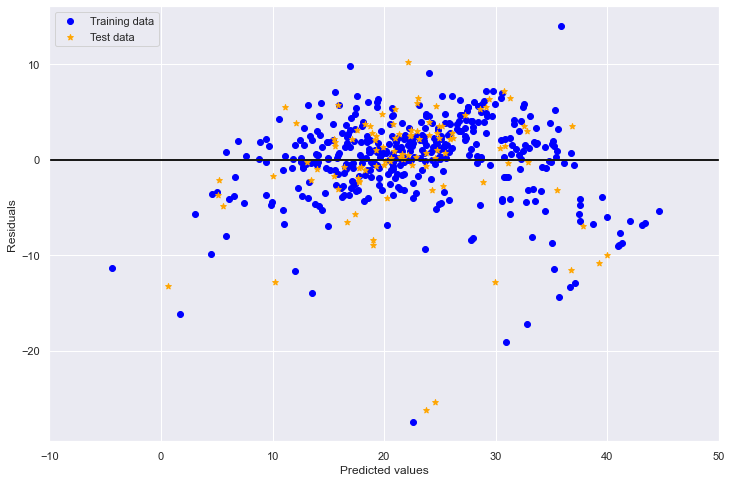

In [26]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='orange', marker='*', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='k')
plt.xlim([-10, 50])
plt.show()

***